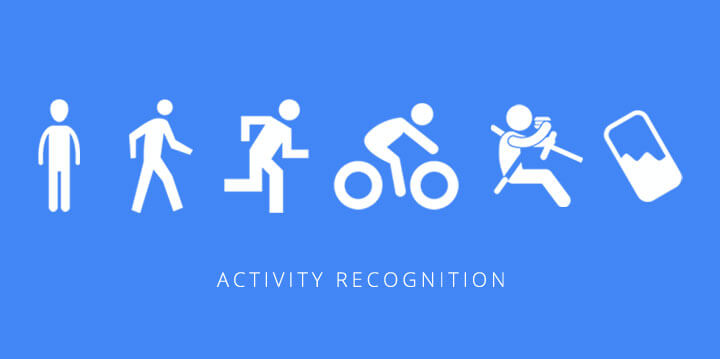

In [83]:
from sklearn.tree import DecisionTreeClassifier
from IPython.core.display import Image, display
from collections import Counter
from sklearn.metrics import accuracy_score

display(Image('https://www.androidhive.info/wp-content/uploads/2017/12/android-user-activity-recognition-still-walking-running-driving.jpg', width=600))

## Analyse avec dataset brut

In [84]:
# récupération de variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET BRUT)
%store -r activity_dataset_full
%store -r colonnes_source
%store -r colonnes_cible
%store -r source
%store -r cible

In [85]:
# afficher dataset
activity_dataset_analysed.head(None)

,Action,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
0,Se lever (chaise),0.635193,0.562164,0.283249,0.328735,0.045013,-1.713516,-2.079834,-0.962936,-2.556274,...,13.272827,13.272827,-2.556274,-0.984238,7.272949,-2.556274,1.018144,2.074506,1.466472,4.316505
1,S'assoir (chaise),-0.049545,0.103683,0.085724,-0.032791,0.163528,0.037842,0.217407,0.337112,0.559769,...,12.002701,12.002701,-0.182434,2.002533,6.366745,-0.182434,0.599039,1.114491,1.628341,3.815634
2,Se lever (chaise),0.297607,-0.080673,0.219788,0.309570,0.875809,1.343872,1.078110,1.118820,0.959610,...,12.541397,12.541397,-0.080673,2.429901,6.154861,-0.080673,0.414755,0.907493,1.593430,3.614473
3,S'assoir (chaise),0.073746,-0.011246,-0.050751,0.015091,-0.114197,0.004318,-0.012436,-0.044769,0.356262,...,13.204590,13.204590,-1.288559,1.834930,6.196762,-1.288559,0.493309,1.464407,1.868406,3.882257
4,S'assoir (chaise),-0.215942,-0.227921,0.054596,0.242538,-0.502060,-0.815704,0.562164,-0.844421,-0.509247,...,10.277679,11.051422,-0.903091,4.098648,2.870010,-0.903091,0.728387,1.497415,2.129965,3.662091
5,Se lever (chaise),0.656738,0.335907,0.605255,0.568146,0.474777,0.628006,0.953613,1.128387,1.390564,...,15.628708,15.628708,-0.776199,4.364410,5.172043,-0.776199,0.473597,1.090411,2.527377,3.521676
6,S'assoir (chaise),0.250916,0.150360,0.199448,0.224579,0.292816,0.116852,0.067764,-0.024414,-0.112991,...,13.021423,13.021423,-0.953369,3.749100,3.809738,-0.953369,0.390260,1.320139,2.513465,3.644460
7,Se lever (chaise),0.563370,0.684265,0.241348,0.832718,0.422104,0.766876,0.699829,0.875809,0.960800,...,15.644272,15.644272,-1.020401,3.656921,3.603836,-1.020401,0.579998,1.623736,2.738212,3.710283
8,S'assoir (chaise),0.446045,0.211411,0.108459,-0.189621,-0.077087,0.341904,-0.041168,-0.728302,-0.229111,...,14.006638,14.006638,-0.885132,3.659317,3.834885,-0.885132,0.384229,1.233144,2.622582,3.736908
9,Se lever (chaise),1.092484,-0.044769,0.268875,0.119232,-0.099838,-0.332062,0.110855,0.428085,0.504700,...,13.496674,13.496674,-0.332062,4.770233,4.878754,-0.332062,0.410586,1.088526,2.347673,3.488197


In [86]:
# afficher les nombres d'exemple dans chaque classe 
count = Counter(activity_dataset_analysed.Action)
count

Counter({'Courrir': 60,
         'Marcher': 57,
         'Ne rien faire': 57,
         "S'allonger (depuis position assise)": 59,
         "S'allonger (depuis position debout)": 56,
         "S'assoir (chaise)": 52,
         "S'assoir (depuis position allongée)": 66,
         'Sauter': 56,
         'Se lever (chaise)': 51,
         'Se lever (depuis position allongée)': 51})

### Split data

In [122]:

x_train, x_test, y_train, y_test = train_test_split(source, cible, test_size=0.7)

display(x_train, y_train, x_test, y_test)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z14,z15,z16,z17,z18,z19,z20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
138,-0.570297,-9.845428,-27.301559,-26.008682,-15.123444,-6.258911,-4.158005,-39.862732,-39.859146,-11.023376,...,-1.003799,-4.196472,13.044174,6.129715,2.078735,0.652985,0.982193,0,0,1
356,-0.000473,0.090515,0.133606,0.159943,-0.017227,0.158737,0.170715,0.137192,0.182678,0.143173,...,2.794601,2.890366,3.079514,3.030426,2.607849,2.856842,2.746719,0,0,1
279,-1.337631,-1.148499,-1.198776,-0.885132,-0.870758,-0.640915,-3.409821,-1.632126,0.774048,0.072556,...,9.960449,9.357101,8.440125,9.410980,7.189148,6.232666,5.859177,0,0,1
49,10.014481,9.753510,11.088272,10.857239,12.069901,11.770615,11.800552,9.959412,7.506546,3.119171,...,4.721924,4.366394,5.518005,7.741013,7.405823,6.187180,5.407867,0,0,1
383,1.852646,0.872208,-1.320877,2.211777,3.914047,-2.116943,-2.409042,-3.415802,-2.816055,-1.545929,...,2.318146,-0.583618,6.636093,11.882980,5.004440,3.098663,2.242737,0,0,1
333,1.214584,1.522247,1.194229,1.360626,1.127197,1.070938,1.050583,1.353455,1.171494,1.184662,...,3.447021,3.424271,3.470963,3.424271,3.466171,3.487717,3.413498,0,0,1
286,1.140366,1.171494,0.414917,0.124023,0.234161,-1.302917,-1.265808,-3.104553,1.001495,-0.481705,...,6.023178,-4.393997,-5.727570,-13.028687,-3.067612,1.328156,-2.314636,0,0,1
540,1.155930,1.679062,1.513855,0.957214,-0.205170,-0.941391,-1.571060,-1.409454,-6.103287,-6.932877,...,-1.817825,-1.526932,-3.180130,-0.296310,-1.578415,0.875641,0.353714,0,0,1
420,0.832718,1.467178,1.668289,1.601242,1.397736,6.110733,-1.727890,-1.401077,-1.617752,-1.193985,...,-4.889587,-7.458572,-6.754669,-6.412308,-10.667999,-8.980087,-7.952972,0,0,1
491,-9.348633,-9.645508,-9.644318,-9.500671,-9.849014,-13.355331,-10.101608,-10.048935,-12.505386,-10.212936,...,1.332932,0.881622,1.156967,2.029648,1.243149,0.360886,0.976196,0,0,1


,Action
138,Sauter
356,Ne rien faire
279,S'allonger (depuis position debout)
49,S'assoir (depuis position allongée)
383,Se lever (depuis position allongée)
333,Ne rien faire
286,S'allonger (depuis position debout)
540,S'allonger (depuis position assise)
420,S'allonger (depuis position assise)
491,S'assoir (depuis position allongée)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z14,z15,z16,z17,z18,z19,z20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
250,0.182678,-0.321289,-0.275803,-1.063492,-0.758240,0.521469,0.983551,-1.543533,5.108749,4.993835,...,10.350693,10.973190,11.355072,6.508011,6.190765,6.080643,3.998886,0,0,1
313,-0.097443,2.950378,0.061783,-0.093842,0.565750,1.415695,4.778351,0.675888,5.521759,11.491699,...,14.742859,3.824097,6.859955,5.780167,0.997742,10.909744,7.481247,0,0,1
410,-0.940201,-1.404678,-1.252640,-0.256653,1.576111,3.969116,3.019821,3.084457,4.037354,7.124680,...,1.894379,2.373215,3.132187,1.765091,0.805008,1.684891,0.934296,0,0,1
40,10.456207,11.302551,12.297348,12.288971,8.091934,9.291428,8.931091,6.900818,2.693008,0.035446,...,5.885513,5.855591,5.508423,5.758621,6.299713,6.235062,6.889877,0,0,1
485,-1.039551,-1.261017,-1.278976,-1.165253,-1.277771,-1.203552,-0.332062,1.348663,2.102829,3.666245,...,-5.526459,-3.424347,-6.284210,-2.971832,0.664948,0.010147,0.457855,0,0,1
475,-0.901886,-0.869568,-0.855194,-0.703171,-0.667252,-0.652893,-1.250244,-0.469742,2.942001,-1.708740,...,-1.171402,3.074722,0.691284,-2.244003,-0.460327,0.407578,1.628616,0,0,1
306,2.433228,1.544983,0.234161,0.437668,2.459564,0.556183,-2.278549,-3.249405,6.223251,3.988266,...,9.738983,5.806503,5.421036,9.697083,4.946991,3.558350,7.757782,0,0,1
63,0.820740,0.927277,1.953201,0.928482,-1.006042,-2.863937,-3.767746,-4.657196,-4.684723,-5.028290,...,0.247162,1.767487,1.519684,-0.292725,-0.603973,0.971405,0.849304,0,0,1
395,-8.984711,-9.341446,-9.716141,-10.133926,-11.591995,-10.388916,-9.932816,-10.077667,-7.585297,-7.791199,...,6.196762,5.611374,3.209991,2.656937,5.466522,7.964874,7.046692,0,0,1
393,-9.641922,-8.967957,-8.777618,-9.810715,-10.296738,-11.815857,-10.773178,-9.692200,-9.395325,-7.693039,...,8.537094,9.121277,4.729111,5.336044,3.515259,5.597015,6.287735,0,0,1


,Action
250,Sauter
313,Courrir
410,S'allonger (depuis position assise)
40,S'assoir (depuis position allongée)
485,S'allonger (depuis position assise)
475,S'allonger (depuis position debout)
306,Courrir
63,S'allonger (depuis position assise)
395,Se lever (depuis position allongée)
393,Se lever (depuis position allongée)


In [123]:
# DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_train, y_train)

predict = clf.predict(x_test)

accuracy_score(y_test, predict)

0.61111111111111116

### Decision tree image

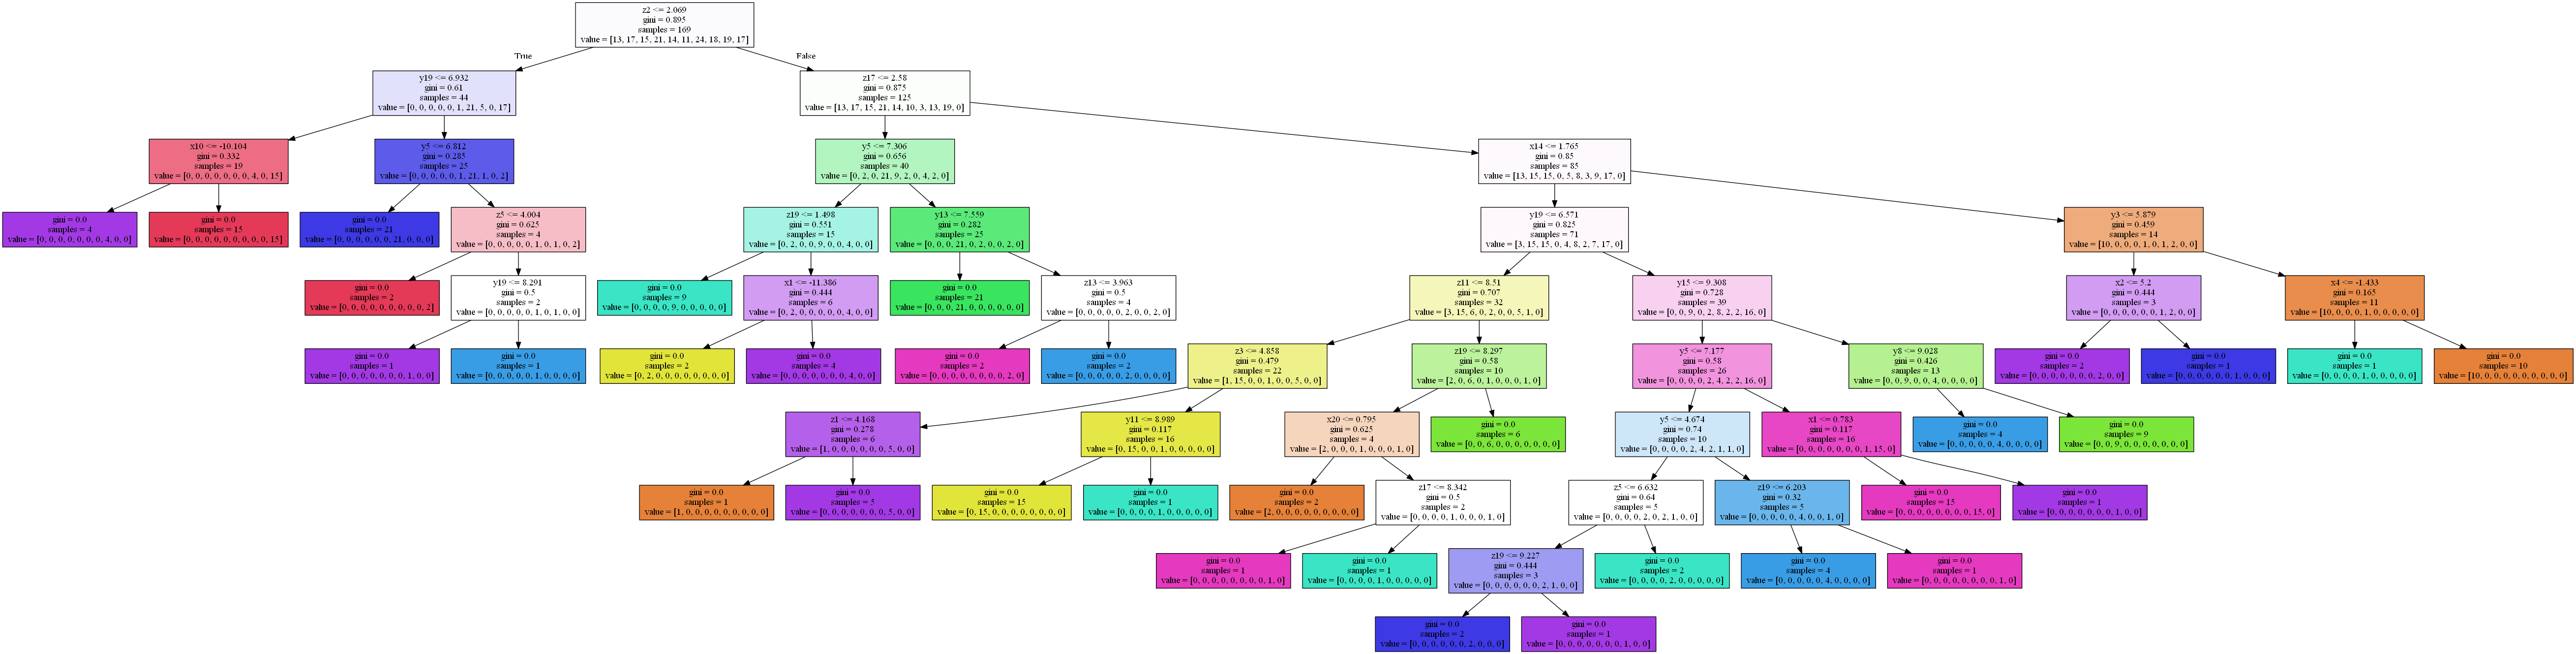

In [124]:
# Install Graphviz + set system path to dot
# pip install export_graphviz

from sklearn.tree import export_graphviz

with open("tree.dot", 'w') as f:
        export_graphviz(clf, out_file=f,
                        feature_names=source.columns,
                        filled=True)
        
!dot -Tpng tree.dot -o tree.png 
display(Image('tree.png'))



## Analyse avec dataset analysé

In [128]:
# récupération des variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET ANALYSE)
%store -r activity_dataset_analysed
%store -r colonnes_source_analysed
%store -r colonnes_cible_analysed
%store -r source_analysed
%store -r cible_analysed

In [129]:
x_analysed_train, x_analysed_test, y_analysed_train, y_analysed_test = train_test_split(source_analysed, cible_analysed, test_size=0.7)

display(x_analysed_train, y_analysed_train, x_analysed_test, y_analysed_test)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
180,2.036987,0.726166,0.179092,0.170715,0.229370,1.418091,0.733353,0.394577,0.516678,2.345840,...,8.626877,9.297668,-0.832458,6.421036,1.112671,-0.832458,0.805946,0.817930,2.025476,3.483620
3,0.073746,-0.011246,-0.050751,0.015091,-0.114197,0.004318,-0.012436,-0.044769,0.356262,0.355072,...,13.204590,13.204590,-1.288559,1.834930,6.196762,-1.288559,0.493309,1.464407,1.868406,3.882257
261,1.795181,1.434845,1.118820,2.476334,-0.322495,0.260498,1.930450,2.337463,2.414078,3.468719,...,18.463455,18.463455,-1.996033,0.627060,-2.536087,-2.536087,1.937940,3.012265,4.435566,4.114914
50,-9.473129,-10.731277,-12.790298,-12.122314,-10.361374,-8.610016,-6.214615,-3.440933,-3.084198,-2.413834,...,8.956070,8.956070,-12.790298,0.181747,0.374054,-12.790298,5.252362,2.732925,2.639799,5.457805
206,0.588501,-0.172852,-0.561905,-0.114197,0.681870,-0.826477,0.074951,-0.594238,-0.591843,-0.812103,...,8.361115,10.254150,-0.826477,7.753403,1.128235,-0.826477,0.585254,0.682077,1.816250,3.973549
549,-9.645508,-9.297150,-9.803528,-9.971130,-10.548126,-11.620728,-10.463135,-11.358566,-11.055695,-10.111191,...,4.160492,9.307236,-11.620728,-1.121902,-0.879303,-11.620728,3.753170,3.749327,1.352123,5.747902
87,-0.083069,-0.092651,-0.056732,-0.091446,-0.074692,-0.093842,-0.056732,-0.072296,-0.075882,-0.096237,...,4.581863,8.975647,-0.104614,8.933746,4.207169,-0.104614,0.013574,0.012092,0.082383,3.722735
507,0.110855,-0.105820,-0.068710,0.039032,0.022278,0.013901,0.175507,0.316757,-0.405090,0.005508,...,12.516251,12.516251,-0.687607,4.579895,3.511658,-0.687607,0.265284,1.307046,2.413245,3.688526
99,-6.327148,-8.978729,-4.456085,-4.333969,-3.312851,-4.754166,-7.707413,-9.098434,-10.499039,-6.729370,...,22.891525,22.891525,-13.387650,-10.210297,0.399200,-13.387650,3.262152,3.990223,5.235946,7.027666
505,-0.013641,0.053391,-0.111801,0.237747,0.517868,0.752502,0.580124,-0.220734,0.422104,-0.213562,...,10.813980,10.813980,-0.346436,4.865997,5.241470,-0.346436,0.301872,1.114262,1.731257,3.493818


,Action
180,S'assoir (chaise)
3,S'assoir (chaise)
261,Sauter
50,S'assoir (depuis position allongée)
206,Se lever (chaise)
549,S'assoir (depuis position allongée)
87,Ne rien faire
507,S'assoir (chaise)
99,Marcher
505,Se lever (chaise)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
194,0.104874,-0.159683,-0.090256,0.274857,0.083328,0.085724,-0.044769,-1.047928,-0.645706,-0.470932,...,6.943741,11.404556,-2.599380,7.306885,0.354904,-2.599380,0.757953,0.788252,1.754582,4.206186
467,-1.343613,-1.826050,-2.940552,-3.952103,-3.660004,-2.241440,-7.217789,-8.414886,-1.134125,2.707367,...,35.643051,35.643051,-16.003311,-7.526398,-14.862640,-16.003311,6.092846,7.152631,12.449069,10.463179
257,2.578079,2.244095,1.957993,1.815536,1.334290,1.717361,1.987915,-0.597824,0.893768,13.652466,...,30.177078,30.177078,-4.056244,-2.910370,-5.842484,-5.842484,4.008047,5.119171,7.134899,5.958936
428,-9.816696,-9.750854,-9.516220,-9.537781,-13.470245,-10.224915,-11.291519,-13.706085,-10.108795,-9.474335,...,5.002045,9.314423,-13.706085,-2.254364,-0.902054,-13.706085,5.342502,4.273511,1.827575,5.930040
184,0.156342,-0.223129,-0.590637,-0.417068,-0.551132,-0.160889,0.058182,-0.740280,0.225784,-2.531143,...,9.008743,10.489975,-2.531143,7.236252,1.253922,-2.531143,0.829454,0.856550,1.982021,4.096386
443,-9.756836,-9.894516,-9.596436,-9.644318,-9.396515,-13.212875,-12.056473,-12.222870,-12.327026,-9.829865,...,2.009293,9.748978,-13.212875,-0.005005,-2.023727,-13.212875,5.823948,3.857820,1.086943,5.876191
189,-0.401505,-0.482910,-0.590637,-0.418259,-0.873154,-1.244263,0.035446,0.660324,0.675888,0.106064,...,6.504410,9.866287,-1.244263,7.205139,1.877625,-1.244263,0.814430,0.718340,1.464026,3.895683
256,-1.264603,-1.102997,-0.770203,-0.007660,-0.663666,-0.158493,0.006714,-0.279388,-2.472488,-0.820480,...,16.046509,16.046509,-5.659164,-0.609543,0.490173,-5.659164,2.114455,2.786207,3.493356,5.084136
539,-0.388336,-0.664856,-1.112579,-1.453751,-0.631348,0.108459,-1.300522,0.765671,6.121506,-0.759430,...,7.229858,17.844971,-3.123703,-3.573563,-4.482574,-4.482574,5.784299,5.919026,3.141111,5.134189
491,-9.348633,-9.645508,-9.644318,-9.500671,-9.849014,-13.355331,-10.101608,-10.048935,-12.505386,-10.212936,...,5.122955,10.023102,-13.355331,-2.247177,-1.783112,-13.355331,4.736542,4.506815,1.565553,5.795734


,Action
194,S'assoir (chaise)
467,Courrir
257,Sauter
428,S'assoir (depuis position allongée)
184,S'assoir (chaise)
443,S'assoir (depuis position allongée)
189,S'assoir (chaise)
256,Sauter
539,S'allonger (depuis position debout)
491,S'assoir (depuis position allongée)


In [ ]:
# DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_analysed_train, y_analysed_train)

predict = clf.predict(x_analysed_test)

accuracy_score(y_test, predict)